## Stat 135 Lab 2

### Ishaan Srivastava

In this report, we analyse the distribution of palindrome locations in the deoxyribonucleic acid (DNA) of human cytomegalovirus (CMV) . To offer some context, "A virus’ DNA contains all of the information necessary for it to grow, survive and replicate." We can think of DNA as a language the virus uses to encode information about itself, where the only letters in the alphabet are A, C, G, and T. Patterns frequently occur in DNA sequences, and understanding these patterns can help us as humans better understand the virus itself. An example of such a pattern is a complementray palindrome, where the sequence of letters read in one direction is the same as its complement read in the other. Note that A and T are complements and C and G are complements, so AACCGGTT would be a valid complementary palindrome. Given that CMV is deadly to those who are immunocompromised, we hope to study the distribution of locations of complementary palindromes in its DNA so that we may better understand the virus and accordingly treat those infected with it while also reducing risk of catching the disease. For further background information, refer to Chapter 4 of "Stat Labs: Mathematical Statistics through Applications" by Deborah Nolan and Terry Speed.

Note that the CMV DNA dataset contains palindrome locations on 240,000 DNA base pairs. Since palindromes of short length are common (such as ACGT), we ignore palindromes that are less than 10 letters long. This is accounted for in the dataset itself. In terms of the format of this report, all the code is provided at the end as an appendix, but only essential snippets of code are included in the report itself. To run the code properly, the appendix must be run before running the code snippets present in the report.



We begin by loading the data. In Chapter 4 of the aforementioned book, palindrome counts are calculated for non-overlapping bins of width 4000 ie. 4000 base pairs. In this report, they are calculated for non-overlapping bins of width 3000 ie. 3000 base pairs. Note that both widths are arbitrary. The textbook excludes the last
1354 base pairs, which include 2 palindromes; these pairs and consequently these palindromes are included in this analysis. The bins are 1-indexed, so the first bin corresponds to locations 1 to 3000 (inclusive), the second to locations 3001 to 6000 (inclusive), and so on. The 62nd bin, corresponding to locations 183001 to 186000 (inclusive), has 0 palindromes of length >= 10, so we hard code this information into our data table. The table is indexed by bins, and the "Count" column indicates how many palindromes of length >= 10 are present in that bin. A snippet of the table is provided below for reference.

In [302]:
binned_hcmv.head()

,Count
Bin,
1,4
2,3
3,1
4,5
5,3


Here is the same data presented in the format as Table 4.2 from the textbook for convenience.

In [303]:
print(binned_hcmv["Count"].values)

[ 4  3  1  5  3  4  6  4  1  1  4  4  3  3  3  2  3  6  5  1  5  8  3  3
  5  7  1  1  6  3 13  6  3  2  5  2  3  1  4  5  3  2  5  4  2  8  3  8
  1  5  6  3  1  2  6  5  6  2  4  3  4  0  6  6  4 10  2  3  3  5  1  1
  4  3  6  5  2]


I then plotted the empirical probability mass function of the counts (given below) by normalising the frequency of each palindrome count with the total count of palindromes.

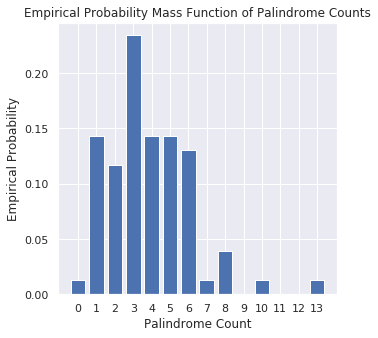

In [345]:
Image("Figure 1.png")

I assumed the counts follow a Poisson distribution, and estimated the parameter of the distribution with the sample average, which was approximately 3.844. I plotted the theoretical probability mass function and also plotted the difference between observed count and expected count for 0 to 13. Even without a formal test, it's clear that the assumption is not reasonable.

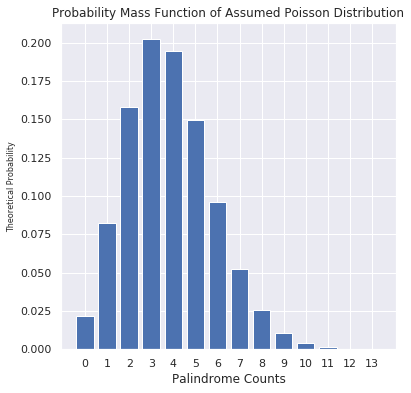

In [346]:
Image("Figure 2.png")

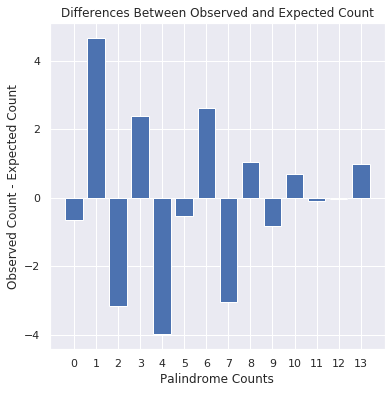

In [347]:
Image("Figure 3.png")

We also run the chi-square goodness-of-fit test to formally verify whether to reject our assumption or not. Assuming there are 14 different categories that the palindrome count can take (0 to 13), there are 12 degrees of freedom since we have 1 estimated parameter. This results in an approximate chi-square value of 104.582 which has p-value on order $10^{-16}$, which shows our assumption that the distribution is Poisson is incorrect for any reasonable p-value cutoff, and hence we reject it which is consistent with my prior informal assessment. Intermediate calculations and variables are defined in appendix.

In [348]:
chi = scipy.stats.chisquare(observed_p*sum(counts[1]), f_exp=poisson_est.pmf(values)*sum(counts[1]), ddof = 1)
(chi[0], chi[1])

(104.58248864271995, 7.012702025625732e-17)

We now move to analysing the distance between successive palindromes, which is defined as the number of base pairs between two consecutive base pairs of complementray palindromes. This variable is technically discrete, but we treat it as continuous. Its observed distribution is plotted below, and we include the histogram and kernel density estimate together for convenience.

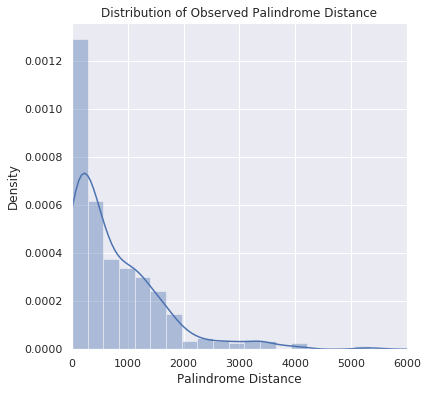

In [349]:
Image("Figure 4.png")

We initially assume the distribution is exponential. The maximum likelihood estimate for the rate parameter of the exponential distribution $\lambda$ is the reciprocal of the sample average, so we calculate this and plot the distribution below accordingly. The MLE is approximately 0.00129. By asymptotic normality of the MLE, we know that MLE is approximately normal with mean = $\hat{\lambda}$ and variance $\frac{\hat{\lambda}^2}{n}$. Here we approximate $\lambda$ with $\hat{\lambda}$ since we don't know the actual value of $\lambda$. Hence the 95% confidence interval is $\hat{\lambda} \pm z_{97.5}\frac{\hat{\lambda}}{\sqrt{n}} = 0.00129 \pm 1.96\frac{0.00129}{\sqrt{295}} = [0.00114, 0.00144]$, where $n$ is number of Palindrome distances and $z_{97.5}$ is the 97.5th quantile of the standard normal.

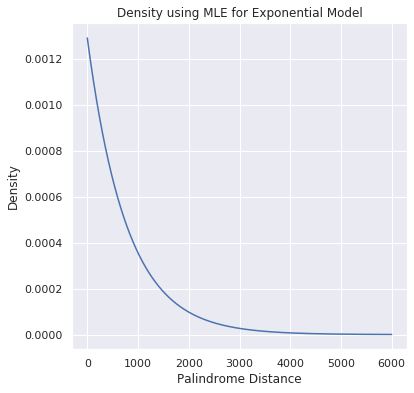

In [399]:
Image("Figure 5.png")

Except for low values of palindrome distance (< 500 base pairs), we see that the two distributions are similar, at least visually speaking. 

Moving on to hypothesis testing, a "scientific hypothesis claims that the successive palindromes appear on average every 500 base pairs." This is equivalent to a simple hypothesis that the data follow an exponential distribution having scale parameter 500 or rate parameter 0.002. As this value is not contained within our 95% confidence interval, the data contradict the scientific hypothesis and hence we reject it with a p-value cutoff of 0.05.

We further treat this scientific hypothesis as a null hypothesis, with the alternative that palindrome distance is exponentially distributed wirh scale parameter 775.512 or rate parameter 0.00129. Since these hypotheses are both simple, we know the Neyman-Pearson test is the most powerful for any given significance level. The power of the test is plotted below for different cutoff values above which the null hypothesis is rejected. We see that the power exponentially decreases as cutoff value increases, which makes sense given that the survival function of the exponential distribution is itself exponentially decaying.

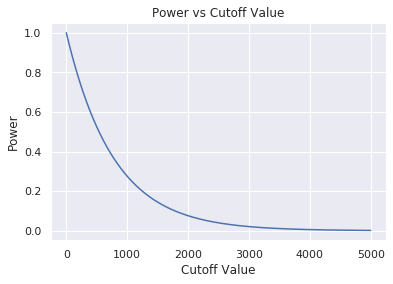

In [435]:
Image("Figure 6.png")

# Appendix

In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sc
import seaborn as sns
from IPython.display import Image
sns.set()

In [334]:
hcmv_data = pd.read_csv("hcmv.data", sep = "\s+")
hcmv_data["Bin"] = hcmv_data.apply(lambda z: ((z["location"] - 1)//3000) + 1, axis = 1)
hcmv_data.rename({"location": "Count"}, axis = 1, inplace = True)
binned_hcmv = hcmv_data.groupby("Bin").agg("count")
binned_hcmv.loc[62] = 0 
binned_hcmv = binned_hcmv.sort_index()
binned_hcmv

,Count
Bin,
1,4
2,3
3,1
4,5
5,3
...,...
73,4
74,3
75,6


In [335]:
print(binned_hcmv["Count"].values)

[ 4  3  1  5  3  4  6  4  1  1  4  4  3  3  3  2  3  6  5  1  5  8  3  3
  5  7  1  1  6  3 13  6  3  2  5  2  3  1  4  5  3  2  5  4  2  8  3  8
  1  5  6  3  1  2  6  5  6  2  4  3  4  0  6  6  4 10  2  3  3  5  1  1
  4  3  6  5  2]


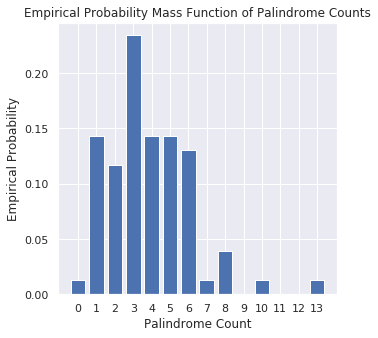

In [336]:
counts = np.unique(binned_hcmv["Count"], return_counts=True)
empirical_p = counts[1]/sum(counts[1])
plt.figure(figsize=(5,5))
plt.bar(counts[0], empirical_p);
values = np.arange(14)
plt.xticks(values);
plt.ylabel("Empirical Probability"); 
plt.xlabel("Palindrome Count"); 
plt.title("Empirical Probability Mass Function of Palindrome Counts");
plt.savefig("Figure 1", bbox_inches='tight')

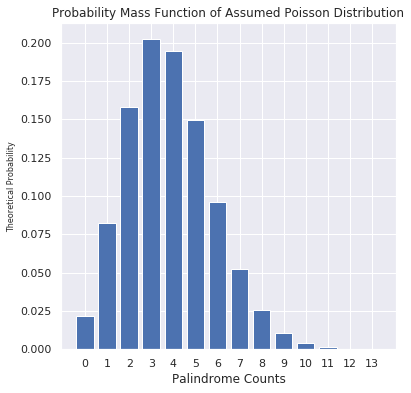

In [337]:
lambda_est = np.sum(counts[0]*empirical_p)
poisson_est = sc.poisson(lambda_est)
plt.figure(figsize=(6,6))
plt.bar(values, poisson_est.pmf(values))
plt.xticks(values);
plt.xlabel("Palindrome Counts");
plt.ylabel("Theoretical Probability", fontsize = 8)
plt.title("Probability Mass Function of Assumed Poisson Distribution");
plt.savefig("Figure 2", bbox_inches='tight')

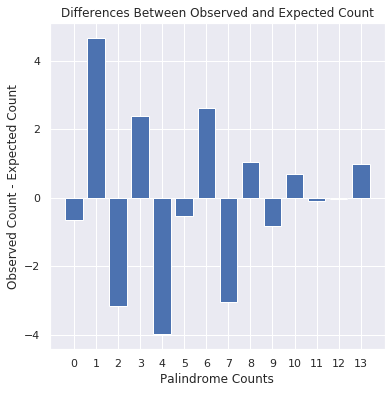

In [338]:
#To account for the fact that no palindrome counts of 9, 11, or 12 were observed
observed_p = np.array(list(empirical_p[0:9]) + [0,empirical_p[9], 0, 0, empirical_p[-1]])
plt.figure(figsize=(6,6))
plt.bar(values, (observed_p - poisson_est.pmf(values))*sum(counts[1]))
plt.xticks(values);
plt.xlabel("Palindrome Counts")
plt.ylabel("Observed Count - Expected Count")
plt.title("Differences Between Observed and Expected Count")
plt.savefig("Figure 3", bbox_inches='tight')

In [339]:
chi = scipy.stats.chisquare(observed_p*sum(counts[1]), f_exp=poisson_est.pmf(values)*sum(counts[1]), ddof = 1)

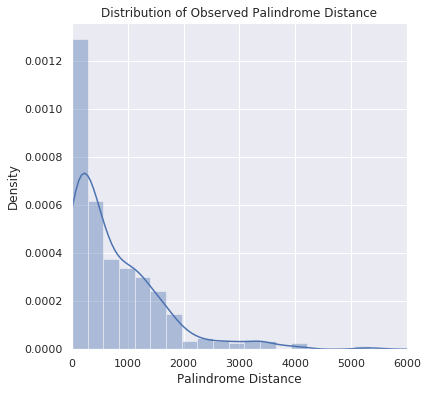

In [340]:
palindrome_distance = np.diff(hcmv_data["Count"])
plt.figure(figsize=(6,6))
sns.distplot(palindrome_distance);
plt.xlim(0,6000)
plt.xlabel("Palindrome Distance")
plt.ylabel("Density")
plt.title("Distribution of Observed Palindrome Distance")
plt.savefig("Figure 4", bbox_inches='tight')

775.5118644067796


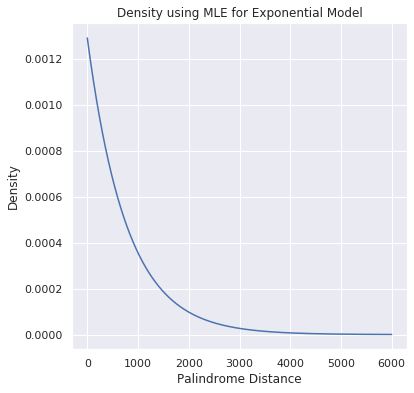

In [341]:
boi = sc.expon(scale = np.mean(palindrome_distance))
print(np.mean(palindrome_distance))
plt.figure(figsize=(6,6))
plt.plot(np.arange(6000), boi.pdf(np.arange(6000)));
plt.xlabel("Palindrome Distance")
plt.ylabel("Density")
plt.title("Density using MLE for Exponential Model")
plt.savefig("Figure 5", bbox_inches='tight')

In [398]:
#1/(np.mean(palindrome_distance) - (1.96*np.mean(palindrome_distance))/np.sqrt(len(palindrome_distance)))
1/np.mean(palindrome_distance) + (1.96*1/np.mean(palindrome_distance))/np.sqrt(len(palindrome_distance))

0.001436619687000134

In [395]:
1/(np.mean(palindrome_distance) + (1.96*np.mean(palindrome_distance))/np.sqrt(len(palindrome_distance))) 
1/np.mean(palindrome_distance) - (1.96*1/np.mean(palindrome_distance))/np.sqrt(len(palindrome_distance))

0.0011423221600467591

In [408]:
1/np.mean(palindrome_distance)

775.5118644067796

775.1937984496125

In [344]:
len(palindrome_distance)

295

In [356]:
sc.norm.ppf(0.99)

2.3263478740408408

In [402]:
alpha_vals = np.arange(0.01, 1, 0.01)
sc.norm.cdf((1/500 + sc.norm.ppf(97.5) * 1/500/np.sqrt(295) - alpha_vals)/(alpha_vals/np.sqrt(295)))

/srv/conda/envs/data100/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/srv/conda/envs/data100/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/srv/conda/envs/data100/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan])

In [433]:
epon = sc.expon(scale = 1/(lambda_0 - lambda_1))
epon.cdf(np.arange(10000000)*(lambda_0 - lambda_1)*lambda_1/lambda_0)

array([0.00000000e+00, 3.25495656e-07, 6.50991206e-07, ...,
       9.61417486e-01, 9.61417499e-01, 9.61417511e-01])

In [418]:
lambda_0 = 1/500
lambda_1 = 1/np.mean(palindrome_distance)

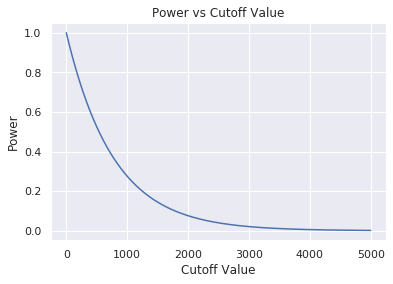

In [434]:
epon = sc.expon(scale = np.mean(palindrome_distance))
plt.plot(np.arange(5000), epon.sf(np.arange(5000)))
plt.xlabel("Cutoff Value")
plt.ylabel("Power")
plt.title("Power vs Cutoff Value");
plt.savefig("Figure 6", bbox_inches='tight');